This notebook contains:
01. Import libraries and data
02. Select variables for visual analysis
03. Create correlation heatmap
04. Use scatterplots to assess promising correlations
    04a. Year constructed and price/unit
    04b. People/apt and total rent
    04c. Picture count and total rent
    04d. People/apt and price/unit
    04e. Living space and total rent
    04f. State population trend and total rent
    04g. State population trend and price/unit
    04h. District population and price/unit
    04i. District population trend and price/unit
    04j. People/apt and price/unit
05. Create pairplots
06. Create categorical plots
07. Observations
08. Q&A (answers to select research questions)

# 01. Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# create shortcut for data imports
path = r'C:\Users\jacym\Desktop\Career Foundry projects\german rent'

In [3]:
df = pd.read_csv(os.path.join(path, '02 data', 'cleaned data', 'rent_district_pop_merged.csv'), index_col = False)

In [4]:
df.shape

(257607, 39)

In [5]:
pd.set_option('display.max_columns', 40)

In [6]:
# always check head to make sure special characters didn't get messed up
df.head(50)

scoutId               regio1  baseRent  totalRent  pricetrend  \
0    96107057  Nordrhein_Westfalen    595.00     840.00        4.62   
1    92798563  Nordrhein_Westfalen    972.60    1320.65        3.76   
2   114894763  Nordrhein_Westfalen    396.80     493.80        4.10   
3    90046012  Nordrhein_Westfalen    310.00     460.00        3.28   
4    87928570  Nordrhein_Westfalen    301.00        NaN        4.41   
5    79343710  Nordrhein_Westfalen   1550.00    2205.00        3.85   
6    62267211  Nordrhein_Westfalen    440.00     525.00        4.41   
7    93403649  Nordrhein_Westfalen    370.00     500.00        4.55   
8   113557346  Nordrhein_Westfalen    403.75     653.75        3.71   
9   111370962  Nordrhein_Westfalen    512.00     672.00        4.44   
10  107358285  Nordrhein_Westfalen    372.09     522.09        4.69   
11  115284222  Nordrhein_Westfalen    419.00     580.00        4.74   
12   99644451  Nordrhein_Westfalen    999.00    1199.00        3.44   
13  111401006  Nordrhein_Westfalen    625.00     775.00        2.64   
14  104869322  Nordrhein_Westfalen    397.93        NaN        4.62   
15  115087406  Nordrhein_Westfalen    519.00     735.00        3.30   
16   88504105  Nordrhein_Westfalen   1040.00    1330.00         NaN   
17  113861119  Nordrhein_Westfalen    497.00     640.00        3.28   
18  113497310  Nordrhein_Westfalen    320.00     480.00        3.85   
19  113554321  Nordrhein_Westfalen    298.00     502.00        4.66   
20  115702632  Nordrhein_Westfalen   1411.00    1853.00        4.12   
21   81203271  Nordrhein_Westfalen    435.00     603.00        3.39   
22  113680965  Nordrhein_Westfalen    489.00     693.00        4.42   
23  111062934  Nordrhein_Westfalen    530.00     600.00        3.07   
24  111092439  Nordrhein_Westfalen    399.00     549.00        4.35   
25  106675137  Nordrhein_Westfalen    520.00        NaN        4.17   
26  115087605  Nordrhein_Westfalen    509.00     724.00        3.30   
27  106153914  Nordrhein_Westfalen    330.00     465.00        4.17   
28  113762884  Nordrhein_Westfalen    610.00        NaN        3.85   
29  111247547  Nordrhein_Westfalen    490.00     650.00        3.46   
30  115470053  Nordrhein_Westfalen    425.00     520.00        4.05   
31  105378094  Nordrhein_Westfalen    400.00     515.00        1.61   
32  115269529  Nordrhein_Westfalen    579.00     766.00        3.79   
33  110742600  Nordrhein_Westfalen    419.00     565.00        3.08   
34  110459538  Nordrhein_Westfalen    569.00     765.00        4.35   
35  112790956  Nordrhein_Westfalen    369.00     522.00        4.66   
36  115087070  Nordrhein_Westfalen    400.00     543.00        3.67   
37  109912987  Nordrhein_Westfalen    559.00     713.00        5.48   
38  115547603  Nordrhein_Westfalen    560.00        NaN        3.10   
39  113336486  Nordrhein_Westfalen    480.00     605.00        4.61   
40  108861959  Nordrhein_Westfalen    340.00        NaN        5.48   
41  114648714  Nordrhein_Westfalen    492.00     612.00        4.05   
42  113807135  Nordrhein_Westfalen   1150.00    1410.00        2.85   
43  115668326  Nordrhein_Westfalen    430.00        NaN        4.05   
44  113669966  Nordrhein_Westfalen    950.00    1200.00        3.49   
45  113680776  Nordrhein_Westfalen    399.00     518.00        4.22   
46  111289971  Nordrhein_Westfalen    330.00     450.00        4.79   
47  106341090  Nordrhein_Westfalen   1540.00        NaN        2.99   
48  113353861  Nordrhein_Westfalen    403.00     586.00        3.15   
49  115663603  Nordrhein_Westfalen    497.06     848.06        4.77   

    livingSpace    plz  picturecount  newlyConst  yearConstructed  \
0         86.00  44269             6       False           1965.0   
1         87.00  44229            12        True           2018.0   
2         62.00  44137             0       False           1958.0   
3         55.00  44329            14       False           1930.0   
4         30.07  44137            31   

Turn hasKitchen, balcony and lift into binary variables to assess them as part of correlations.

In [8]:
df['hasKitchen'] = df['hasKitchen'].astype(int)

In [9]:
df['balcony'] = df['balcony'].astype(int)

In [10]:
df['lift'] = df['lift'].astype(int)

# 02. Select variables for visual analysis

In [11]:
df.columns

Index(['scoutId', 'regio1', 'baseRent', 'totalRent', 'pricetrend',
       'livingSpace', 'plz', 'picturecount', 'newlyConst', 'yearConstructed',
       'firingTypes', 'heatingType', 'hasKitchen', 'cellar', 'condition',
       'street', 'lift', 'typeOfFlat', 'noRooms', 'floor', 'balcony', 'garden',
       'baseRentRange', 'noRoomsRange', 'livingSpaceRange',
       'yearConstructedRange', 'regio2', 'regio3', 'description', 'date',
       'population', 'populationTrend', 'popTrendCat', 'surfaceArea',
       'populationDensity', 'space/person', 'people/apt', 'districtPopTrend',
       'districtPop', 'price/unit'],
      dtype='object')

In [12]:
# create subset of numeric variables that could produce meaningful correlations (i.e. no date, index, PLZ)
sub = df[['price/unit', 'baseRent', 'totalRent', 'pricetrend', 'hasKitchen', 'balcony', 'lift',
       'livingSpace', 'picturecount', 'yearConstructed', 'noRooms', 'floor',
      'population', 'populationTrend', 'districtPop', 'districtPopTrend', 'populationDensity', 'space/person', 'people/apt']]

In [13]:
# view all correlations in defined subset
sub.corr()

price/unit  baseRent  totalRent  pricetrend  hasKitchen  \
price/unit           1.000000  0.554235   0.531744    0.498037    0.332502   
baseRent             0.554235  1.000000   0.987575    0.422873    0.265462   
totalRent            0.531744  0.987575   1.000000    0.418350    0.252304   
pricetrend           0.498037  0.422873   0.418350    1.000000    0.247345   
hasKitchen           0.332502  0.265462   0.252304    0.247345    1.000000   
balcony              0.096728  0.242168   0.256744    0.109172    0.079614   
lift                 0.309914  0.298784   0.310920    0.195295    0.133769   
livingSpace         -0.024842  0.703856   0.737179    0.153685    0.080320   
picturecount         0.150849  0.291724   0.293153    0.111509    0.151188   
yearConstructed      0.221402  0.178327   0.183669    0.138869    0.098469   
noRooms             -0.137953  0.447847   0.476348    0.033360   -0.042059   
floor                0.054713  0.039766   0.043671    0.035035   -0.015896   
population           0.110323  0.088676   0.100174    0.152250   -0.042310   
populationTrend      0.461999  0.404222   0.402181    0.576906    0.294985   
districtPop          0.391811  0.327877   0.328824    0.551810    0.147378   
districtPopTrend     0.366680  0.325245   0.321266    0.548043    0.211317   
populationDensity    0.271192  0.235980   0.246089    0.485791    0.126102   
space/person         0.110325  0.101015   0.094973    0.079139    0.135701   
people/apt           0.280206  0.245332   0.242633    0.294616    0.172902   

                    balcony      lift  livingSpace  picturecount  \
price/unit         0.096728  0.309914    -0.024842      0.150849   
baseRent           0.242168  0.298784     0.703856      0.291724   
totalRent          0.256744  0.310920     0.737179      0.293153   
pricetrend         0.109172  0.195295     0.153685      0.111509   
hasKitchen         0.079614  0.133769     0.080320      0.151188   
balcony            1.000000  0.216316     0.244265      0.121293   
lift               0.216316  1.000000     0.120447      0.092031   
livingSpace        0.244265  0.120447     1.000000      0.275666   
picturecount       0.121293  0.092031     0.275666      1.000000   
yearConstructed    0.288121  0.321081     0.067640      0.007379   
noRooms            0.198793 -0.012886     0.768574      0.192834   
floor              0.021426  0.221292    -0.014963      0.011145   
population         0.036311 -0.000983     0.071986      0.009717   
populationTrend    0.122928  0.131712     0.190713      0.072566   
districtPop        0.070484  0.172013     0.071426      0.097353   
districtPopTrend   0.124109  0.217779     0.130736      0.132597   
populationDensity  0.057947  0.125905     0.068681      0.060449   
space/person       0.047367 -0.009539     0.097268     -0.016308   
people/apt         0.090079  0.025212     0.156943      0.008482   

                   yearConstructed   noRooms     floor  population  \
price/unit                0.221402 -0.137953  0.054713    0.110323   
baseRent                  0.178327  0.447847  0.039766    0.088676   
totalRent                 0.183669  0.476348  0.043671    0.100174   
pricetrend                0.138869  0.033360  0.035035    0.152250   
hasKitchen                0.098469 -0.042059 -0.015896   -0.042310   
balcony                   0.288121  0.198793  0.021426    0.036311   
lift                      0.321081 -0.012886  0.221292   -0.000983   
livingSpace               0.067640  0.768574 -0.014963    0.071986   
picturecount              0.007379  0.192834  0.011145    0.009717   
yearConstructed           1.000000  0.025614  0.036338    0.103543   
noRooms                   0.025614  1.000000 -0.004993    0.052263   
floor                     0.036338 -0.004993  1.000000   -0.103473   
population                0.103543  0.052263 -0.103473    1.000000   
populationTrend           0.202267  0.074926 -0.081507    0.437469   
districtPop               0.015448 -0.018171  0

Lots of intriguing correlations here! I'll put them on a heatmap to get a better look, but first let's remove baseRent from the subset because its correlations are so similar to those of totalRent and the two have such a high correlation with each other.

In [14]:
sub2 = df[['price/unit','totalRent', 'pricetrend', 'hasKitchen', 'balcony', 'lift',
       'livingSpace', 'picturecount', 'yearConstructed', 'noRooms', 'floor',
      'population', 'populationTrend', 'districtPopTrend', 'districtPop', 'populationDensity', 'space/person', 'people/apt']]

# 03. Create correlation heatmap

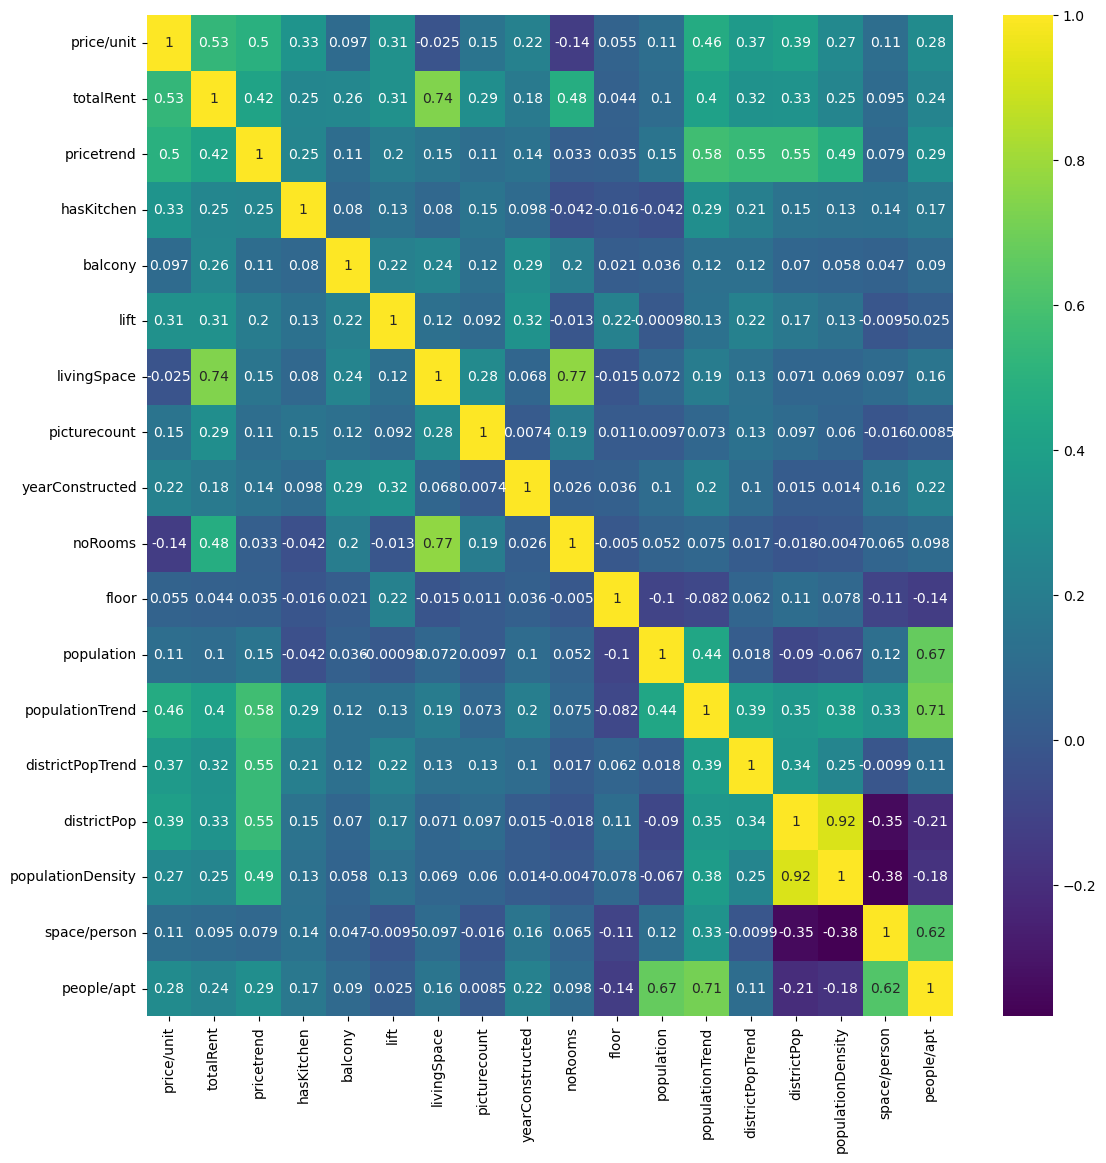

In [19]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(13,13))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub2.corr(), annot = True, ax = ax, cmap='viridis') 
# The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

plt.savefig("correlation heatmap.png", dpi = 300)


Relevant correlations over 0.4:
totalRent and livingSpace: .74
pricetrend and populationTrend: .58
pricetrend and populationDensity: .48
totalrent and noRooms: .48
price/unit and populationTrend: .47
totalRent and pricetrend: .42
totalRent and populationTrend: .41

smaller but interesting correlations:
people/apt and pricetrend: .32
people/apt and price/unit: .3
picturecount and totalRent: .29
people/apt and totalRent: .26
populationDensity and totalRent: .25
people/apt and yearConstructed: .23
yearConstructed and totalRent: .19
population and pricetrend: .18


rent_pairs: totalRent, livingSpace, noRooms, pricetrend
pricetrend: pricetrend, populationTrend, populationDensity, population
pop_pairs: populationTrend, population, totalRent, populationDensity
other_pairs: people/apt, yearConstructed, totalRent, pricetrend

# 04. Use scatterplots to assess promising correlations

Note: The following scatterplots show that high variability in the data is weakening the correlations, but there are still some interesting potential relationships.

# 04a. Year constructed and price/unit

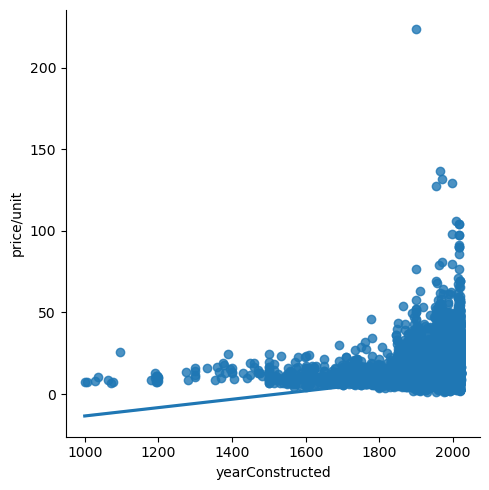

In [16]:
sns.lmplot(x = 'yearConstructed', y = 'price/unit', data = df)

The scatterplot shows a positive (.22) correlation between year constructed and price/unit, meaning that newer units tend to cost more after adjusting for apartment size. However, there's a lot of price variability in the newer units that is worth investigating.

# 04b. People/apt and total rent

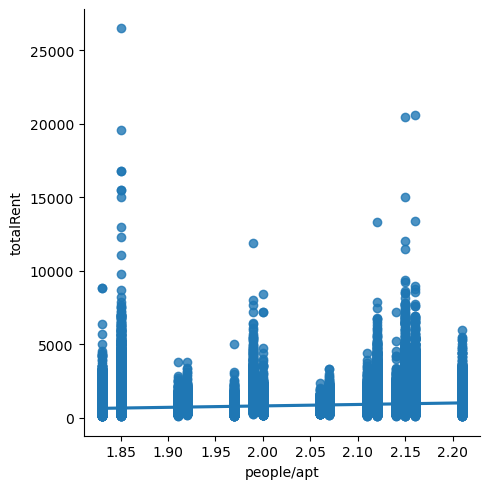

In [17]:
sns.lmplot(x = 'people/apt', y = 'totalRent', data = df)

While there's a .26 correlation between apartment total rent and the number of people per apartment in the unit's state, the scatterplot shows that there's no clear relationship here.

# 04c. Picture count and total rent

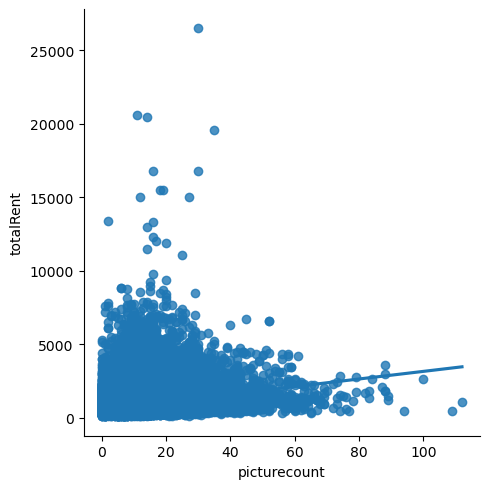

In [18]:
sns.lmplot(x = 'picturecount', y = 'totalRent', data = df)

The scatterplot suggests the relationship between picture count and total rent isn't linear. As pictures increase to 20, rent goes up, then rent goes down as pictures increase to 60, then it goes back up as pictures increase.

# 04d. People/apt and price/unit

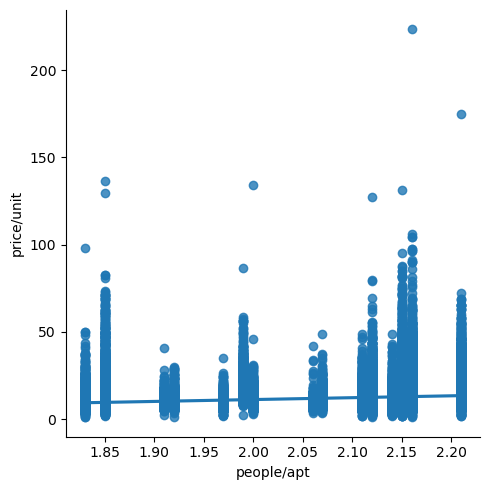

In [19]:
sns.lmplot(x = 'people/apt', y = 'price/unit', data = df)

There's no obvious relationship between people/apt and price/unit.

# 04e. Living space and total rent

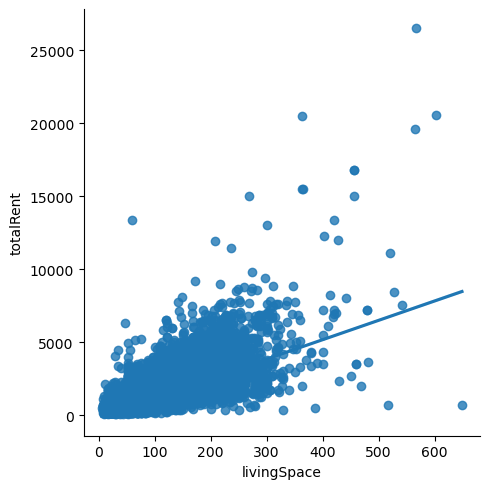

In [20]:
sns.lmplot(x = 'livingSpace', y = 'totalRent', data = df)

Strongest correlation in the bunch, though there is still a lot of variability!

# 04f. State population trend and total rent

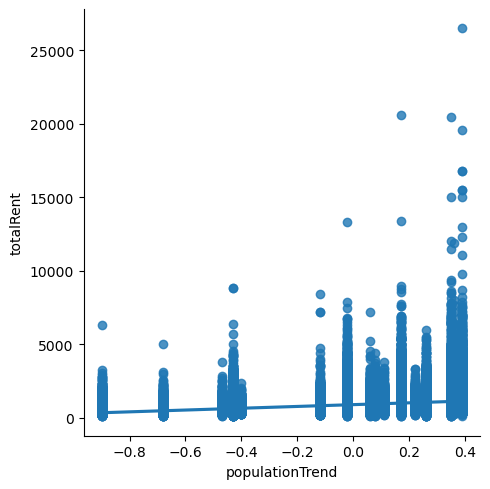

In [21]:
sns.lmplot(x = 'populationTrend', y = 'totalRent', data = df)

The relationship may be more important than the weak correlation coefficient suggests. While lower rents are available everywhere, higher rents are concentrated in areas with more population growth. 

# 04g. State population trend and price/unit

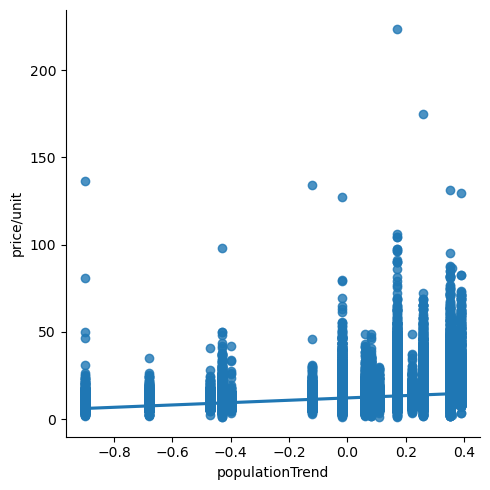

In [22]:
sns.lmplot(x = 'populationTrend', y = 'price/unit', data = df)

This is very similar to the relationship between populationTrend and totalRent. I'll run with this one because the correlation is stronger. I'd like to look at the relationshiop without the rent outliers.

# 04h. District population and price/unit

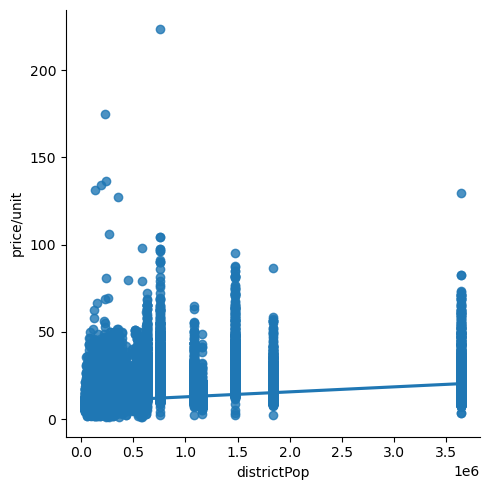

In [23]:
sns.lmplot(x = 'districtPop', y = 'price/unit', data = df)

This correlation doesn't look promising.

# 04i. District population trend and price/unit

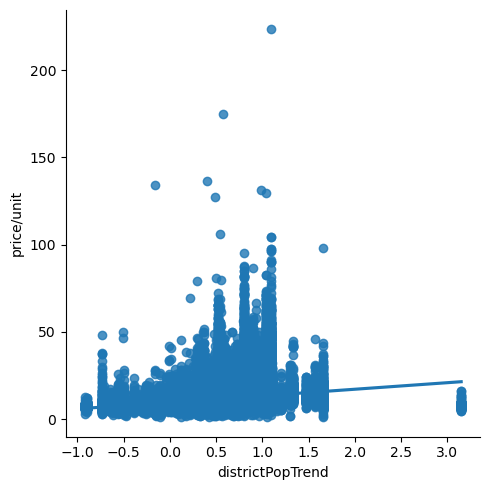

In [12]:
sns.lmplot(x = 'districtPopTrend', y = 'price/unit', data = df)

# 04j. People/apt and price/unit

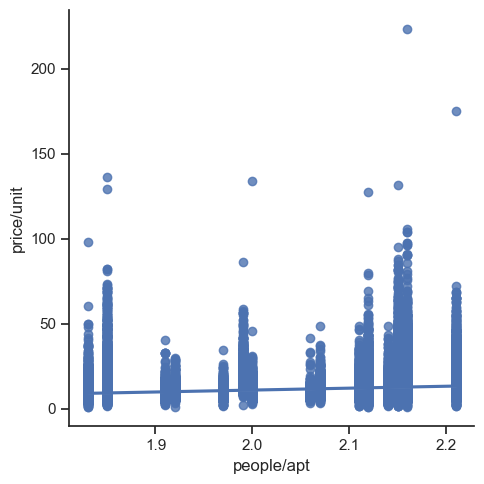

In [29]:
sns.lmplot(x = 'people/apt', y = 'price/unit', data = df)

There is a slight positive relationship between people/apt and unit price, but it's not very pronounced.

# 05. Create pairplots

First I'll make a giant pairplot with all the numerical variables. Let's see if anything sticks out...

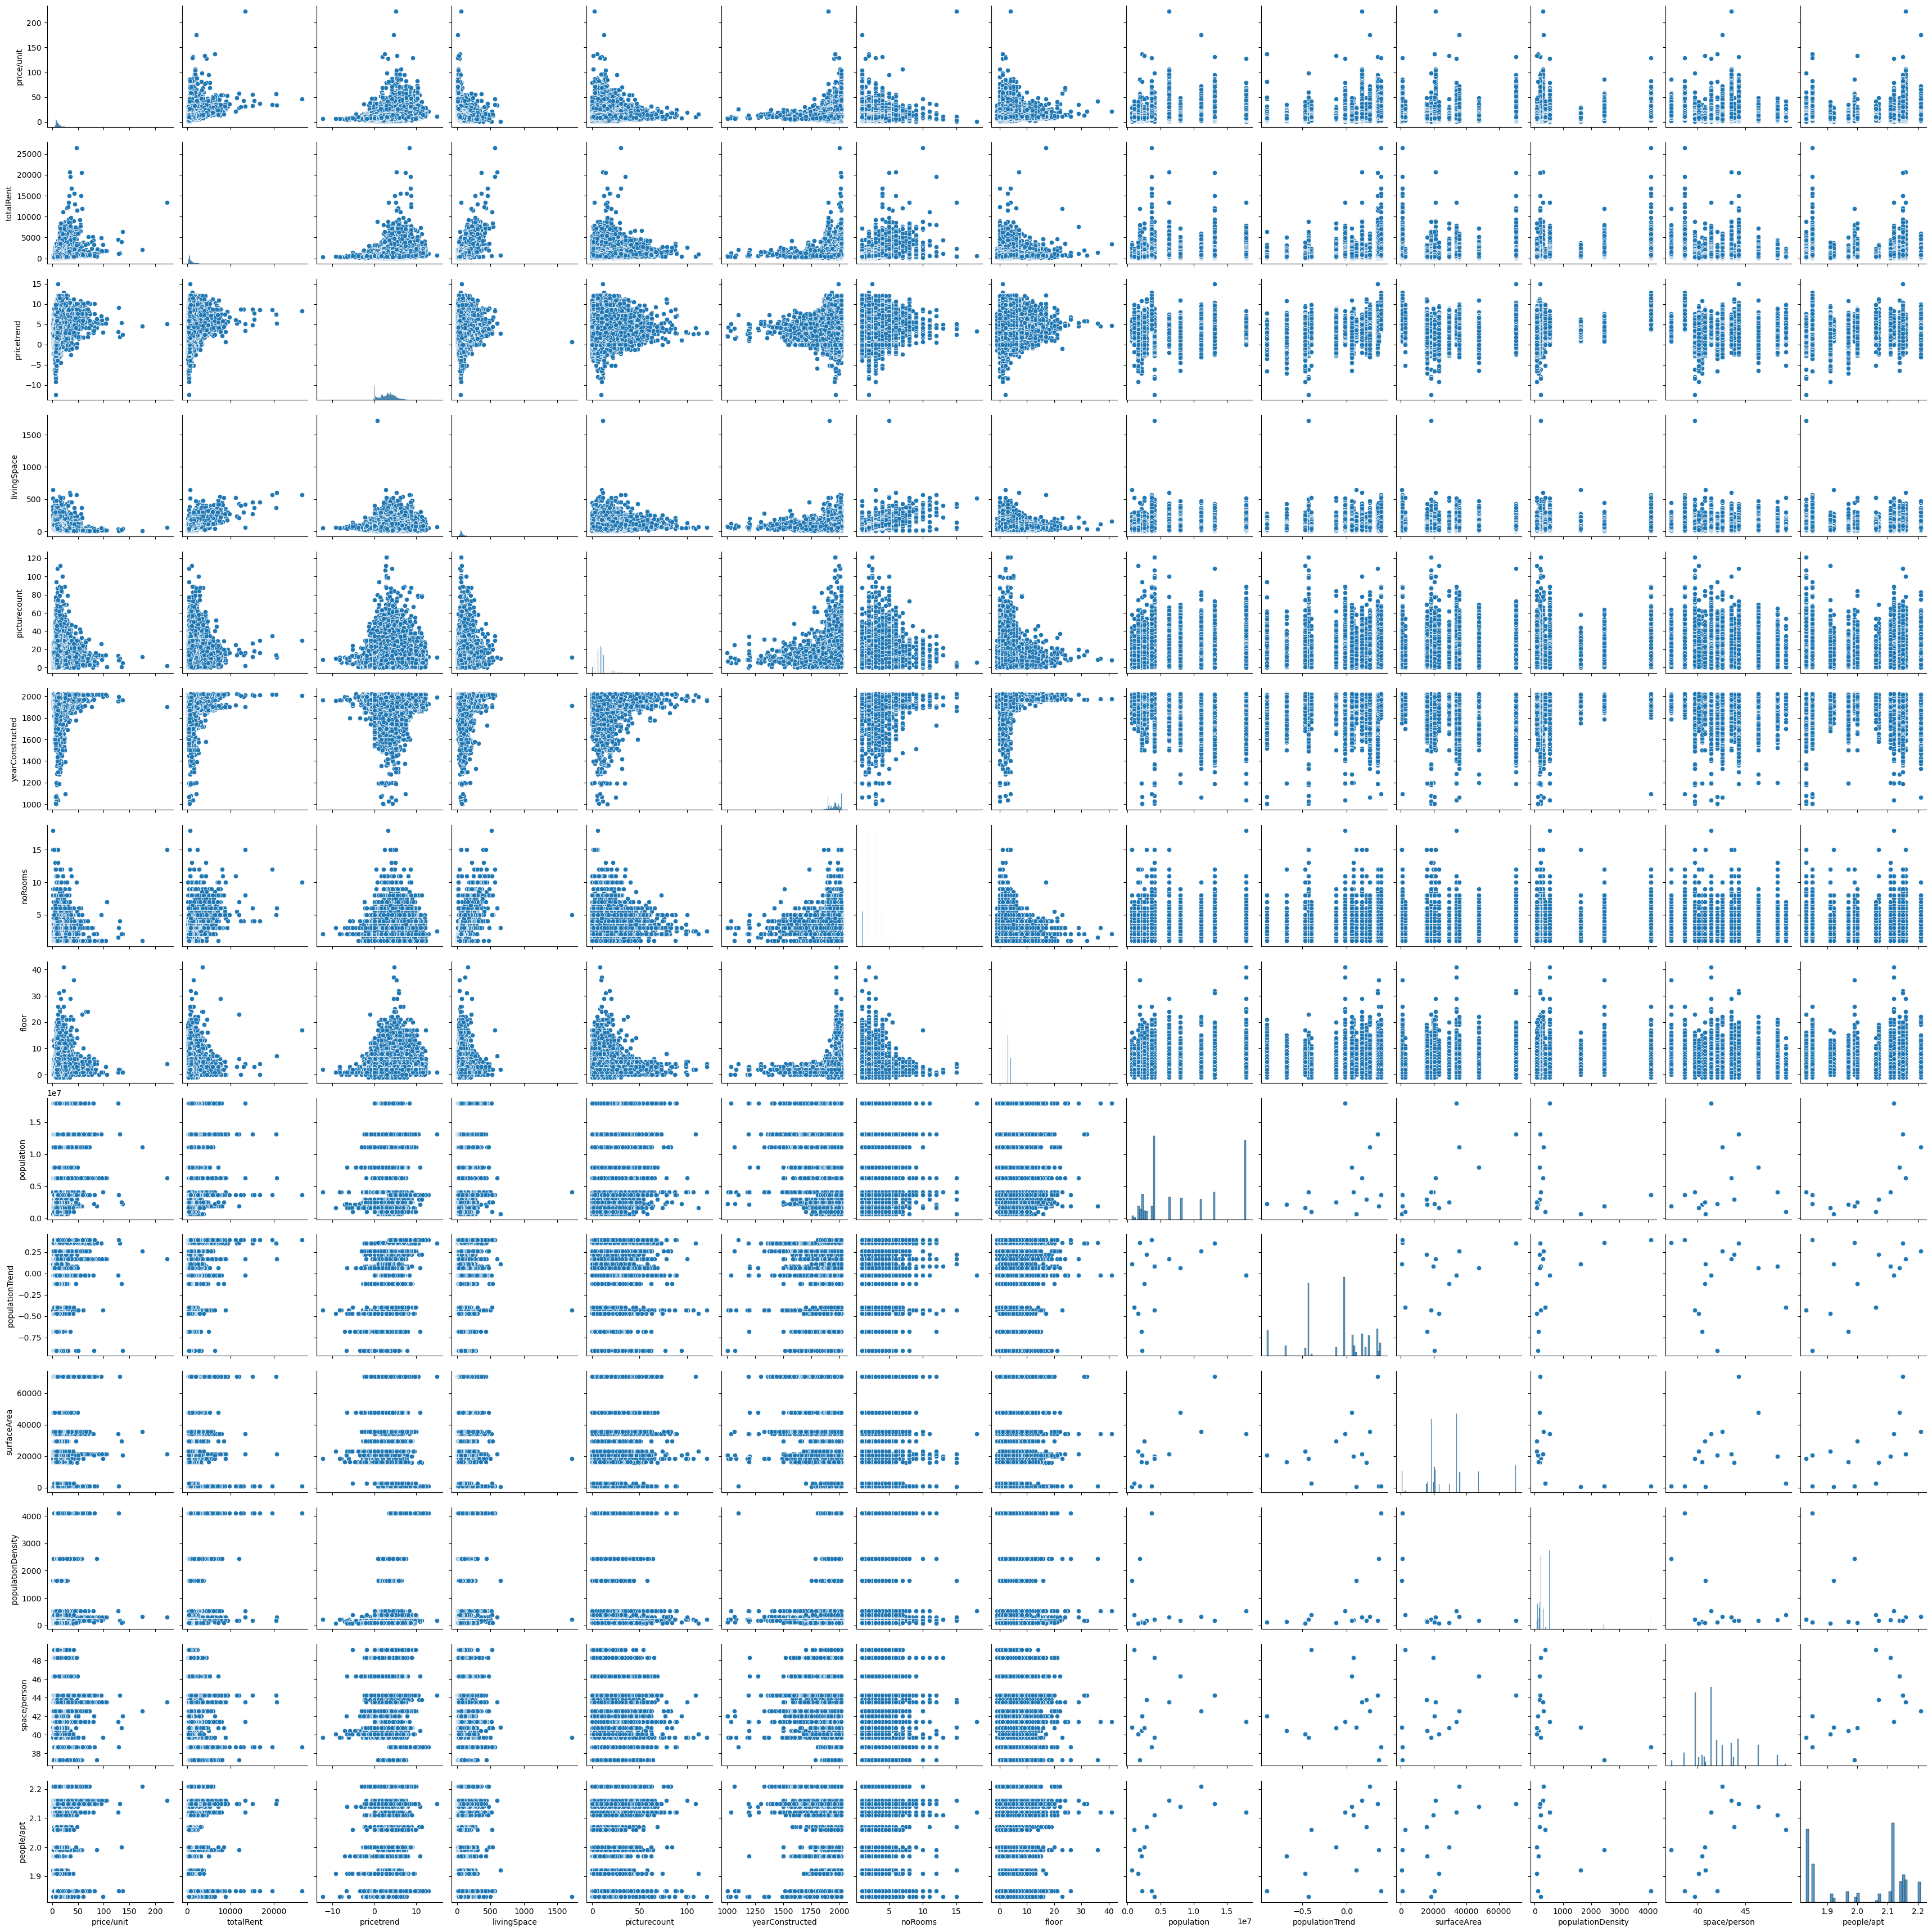

In [21]:
g = sns.pairplot(sub2)

Woof, that's a lot of charts! After giving myself a headache looking at them, I see a bunch of interesting relationships:
-Price/unit and picturecount, yearConstructed, noRooms, floor
-totalRent and yearConstructed 
-picturecount and yearConstructed, noRooms, floor
I'll create some subsets to view the relationships in closer detail.

In [22]:
rent_pairs = sub2[['totalRent', 'pricetrend', 'livingSpace', 'noRooms']]

pricetrend_pairs = sub2[['pricetrend', 'population', 'populationTrend', 'populationDensity']]

pop_pairs = sub2[['totalRent', 'population', 'populationTrend', 'populationDensity']]
    
other_pairs = sub2[['totalRent', 'pricetrend', 'yearConstructed', 'people/apt']]

picture_pairs = sub2[['price/unit', 'picturecount', 'yearConstructed', 'noRooms', 'floor']]

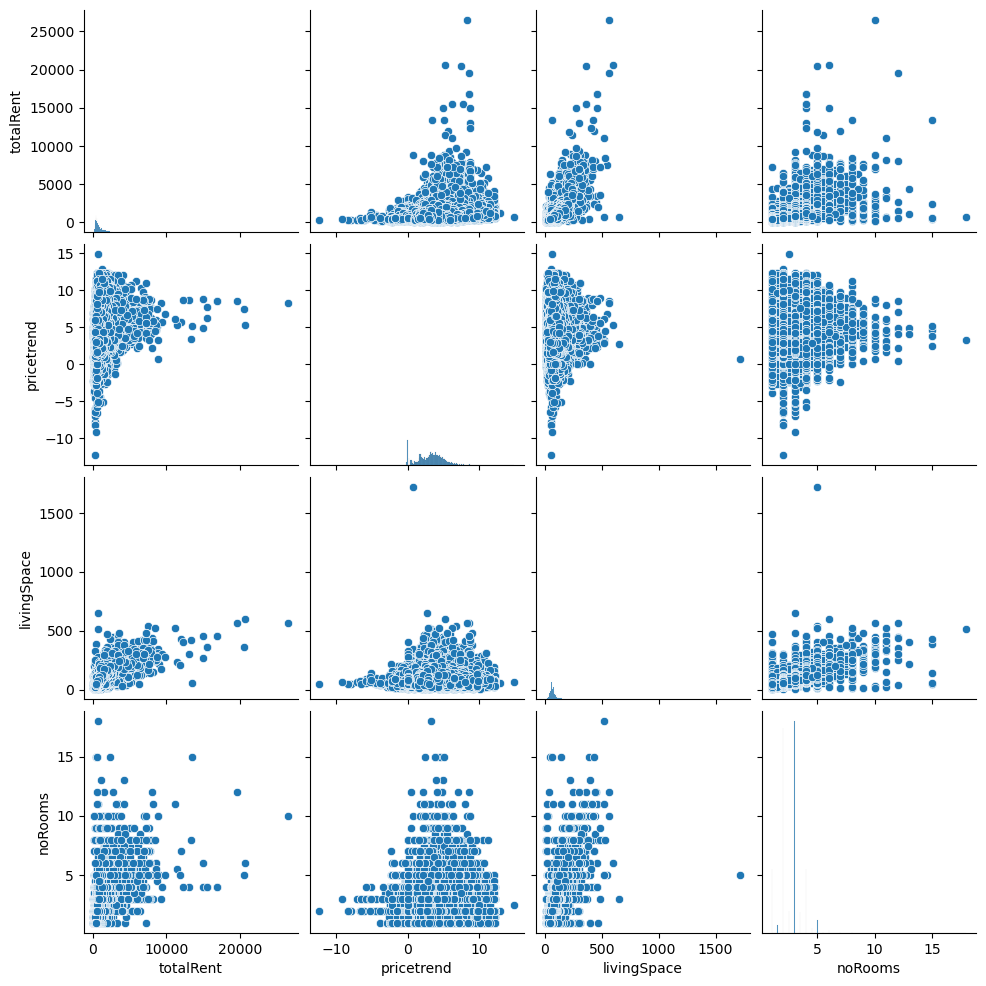

In [26]:
g = sns.pairplot(rent_pairs)

Living space and total rent is the clearest relationship. The others don't look strong enough to pursue.

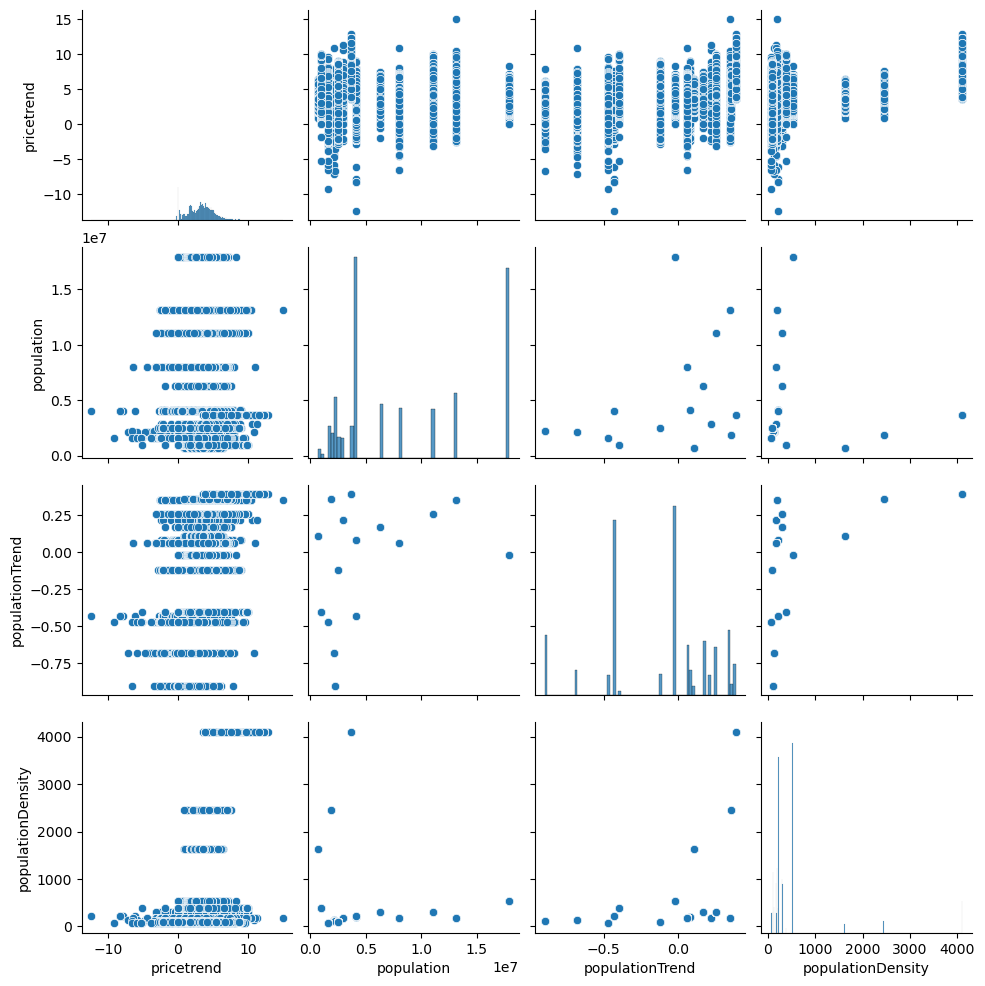

In [28]:
g = sns.pairplot(pricetrend_pairs)

Pricetrend and population trend is the only plot that looks interesting, but as discussed above, other variables have a clearer relationship with population trend. Distribution of pricetrend looks normal, and distribution of population and population trend look fairly normal.

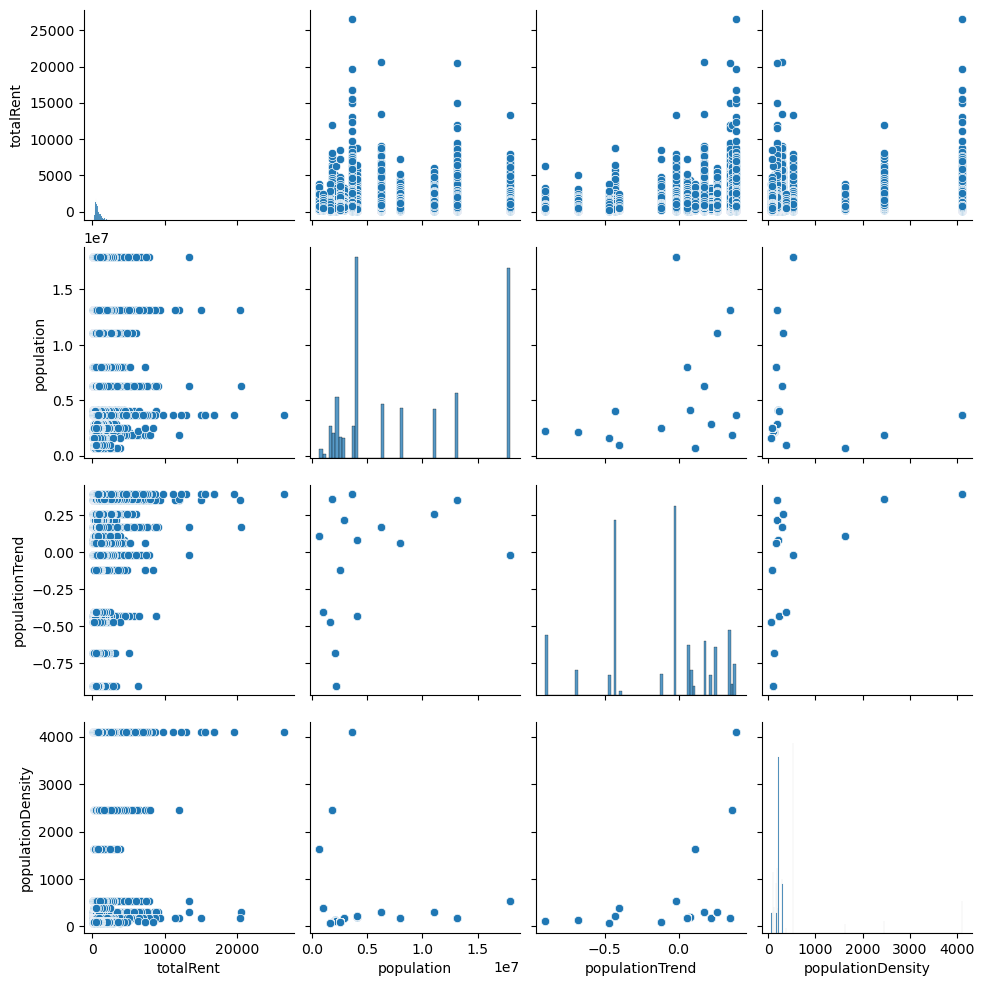

In [29]:
g = sns.pairplot(pop_pairs)

Population trend and total rent is the only relationship that jumps out, as discussed above. The other trends don't look noteworthy.

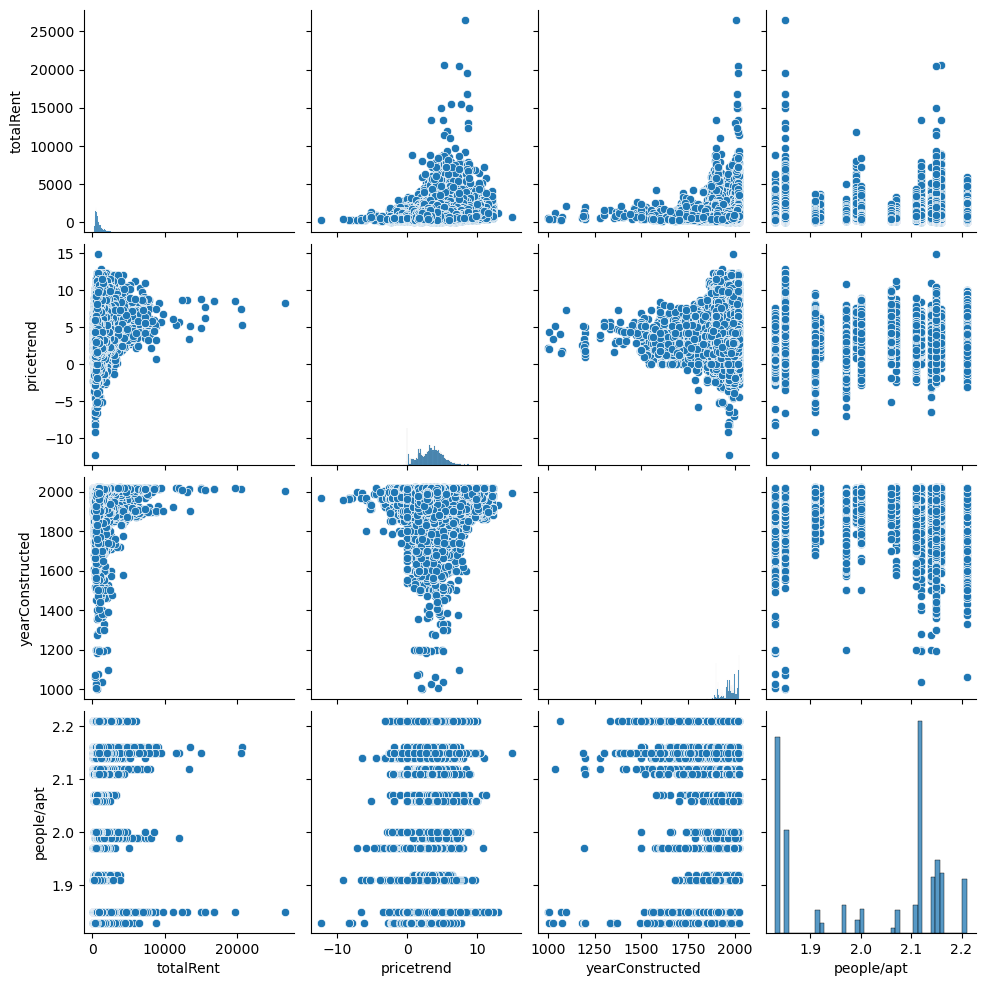

In [30]:
g = sns.pairplot(other_pairs)


Total rent and year constructed seem to have a positive relationship.

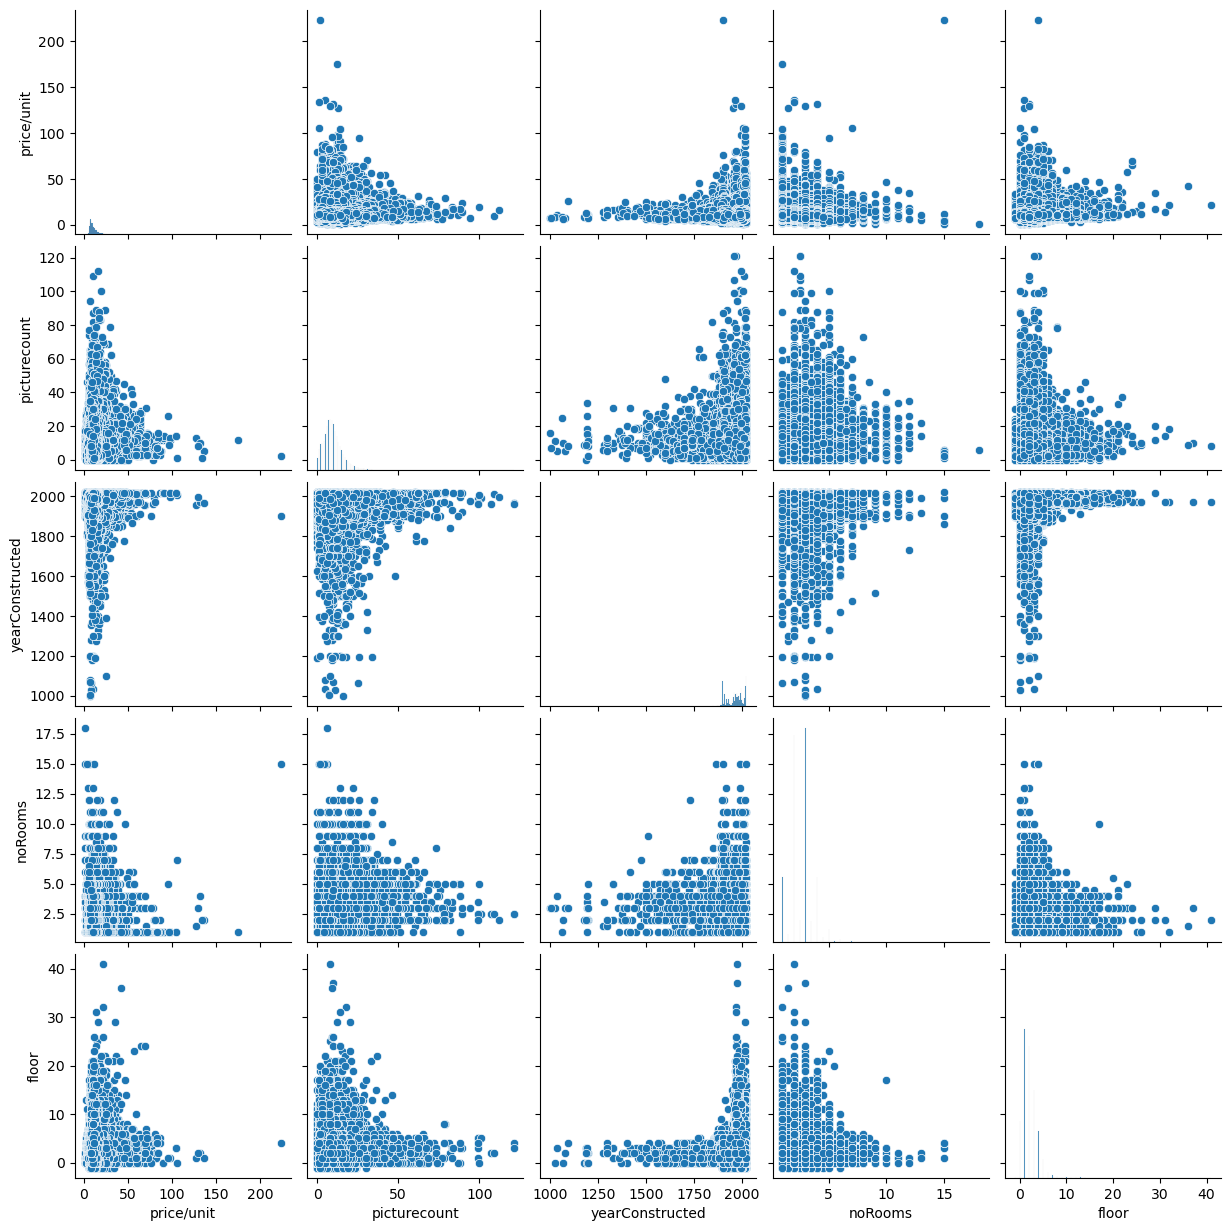

In [23]:
g = sns.pairplot(picture_pairs)

I see possible relationships between floor and price/unit, floor and picture count, floor and year constructed (mostly because newer buildings are taller, I'd guess), floor and number of rooms (higher units have fewer rooms- this makes sense for high rises). 
Some other possible relationships that stick out: Listings with more pictures might tend to be newer and, in some cases, have a higher unit price. 

# 06. Create categorical plots

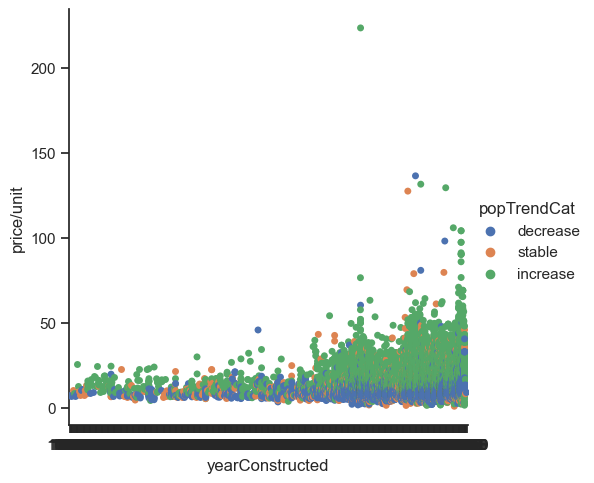

In [50]:
sns.set(style="ticks")
g = sns.catplot(x='yearConstructed', y='price/unit', hue='popTrendCat', data=df)

This chart shows that newer units tend to be more expensive (higher price/unit) in areas with increasing population, but the trend is less pronounced in areas with stable and decreasing population.

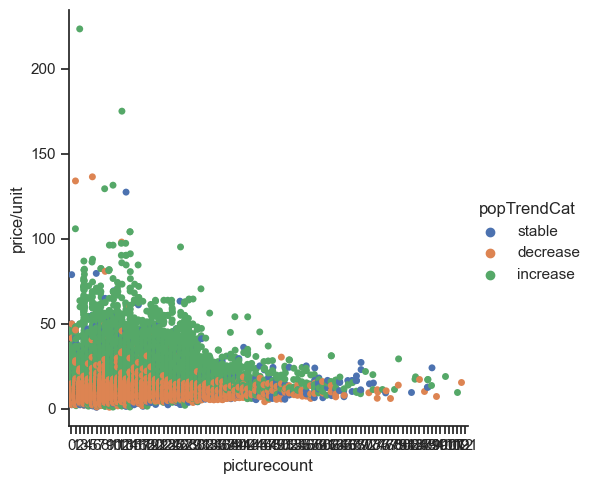

In [32]:
sns.set(style="ticks")
g2 = sns.catplot(x='picturecount', y='price/unit', hue='popTrendCat', data=df)

When I color-code the data points by population trend, it looks like the relationship between picture count and price/unit (including the fluctuations noted earlier) is most pronounced in areas where population is increasing.

# 07. Observations

Overall, I see there are many small and inconsistent correlations between rent/rent per square meter (price/unit) and other features. The strongest correlation is rent and apartment size, and there appears to be a small positive correlation between price/unit and district + state population growth.
However, there's so many data points and so much variability that simple scatterplots aren't the best way to assess relationships. See notebooks 4, 5, 6 and 7 for other methods of analyzing relationships in this data.

# 08. Q&A (answers to selected research questions)

Here are the ones I can at least partially address.Q

Q: Is rent higher in areas with faster-growing population, higher population density and less living space relative to population?
A: Price per unit and total rent appear to be higher in places with higher rates of population growth. The price trend metric tends to be higher in areas with higher population density. Living space relative to population doesn't appear to be strongly correlated with the cost of rent.

Q: How does the number of pictures attached to an advertisement relate to the rental price?
A: The number of pictures appears to have a weak positive correlation with price per unit.

Q: Does the unit floor have a correlation with price? 
A: I don't see a clear correlation between these factors.

Q: Are older units more or less affordable than newer units?
A: Newer units are more expensive than older units in some areas.
